In [9]:
import pandas as pd
d1 = {
    "국어" : [100, 90, 85, 85, 90, 65, 70, 85],
    "수학" : [100, 90, 100, 70, 70, 80, 100, 60],
    "영어" : [90, 90, 75, 95, 90, 75, 90, 75]
}
d1 = pd.DataFrame(d1, index = ["홍길동", "김영희", "김희원", "강희진", "최소희", "이사랑", "박아라", "안경진"])
d1

,국어,수학,영어
홍길동,100,100,90
김영희,90,90,90
김희원,85,100,75
강희진,85,70,95
최소희,90,70,90
이사랑,65,80,75
박아라,70,100,90
안경진,85,60,75


In [10]:
d1['합계'] = d1['국어'] + d1['수학'] + d1['영어']
d1['평균'] = d1['합계'] / 3
d1

,국어,수학,영어,합계,평균
홍길동,100,100,90,290,96.666667
김영희,90,90,90,270,90.000000
김희원,85,100,75,260,86.666667
강희진,85,70,95,250,83.333333
최소희,90,70,90,250,83.333333
이사랑,65,80,75,220,73.333333
박아라,70,100,90,260,86.666667
안경진,85,60,75,220,73.333333


In [13]:
#d1.iloc[1:4]
d1.loc['김영희': '강희진']

,국어,수학,영어,합계,평균
김영희,90,90,90,270,90.000000
김희원,85,100,75,260,86.666667
강희진,85,70,95,250,83.333333


In [15]:
d1.loc['김영희': '강희진', '합계' : '평균']
d1.loc['김영희': '강희진', ['합계', '평균']]

,합계,평균
김영희,270,90.000000
김희원,260,86.666667
강희진,250,83.333333


In [17]:
# 결측치 처리 : missing feature (표기되지 않은 값)
# : 데이터는 다양한 원인으로 누락됨, None, NaN, 빈칸 등이 누락 데이터임

# MCAR : Missing completely at random : 완전 무작위 결측
# MAR : Missing at random 
# MNAR : Missing not at random
# 10 % 미만 -> Deletion or Imputation
# 10 ~ 50% -> 예측모델 기반 Deletion
# 50 % ~ -> 해당 컬럼(변수) 자체 제거


In [ ]:
#inner join : 교집합
# outer join : 합집합


In [19]:
d_주문 = {
    "CUST_ID" : [100, 100, 200, 200, 300],
    "ORD_NO" : [11, 12, 13, 14, 15],
    "ITEM_CD" : ['001', '002', '003', '004', '005']
}
d_주문 = pd.DataFrame(d_주문)
d_주문

,CUST_ID,ORD_NO,ITEM_CD
0,100,11,001
1,100,12,002
2,200,13,003
3,200,14,004
4,300,15,005


In [22]:
d_고객 = {
    "CUST_ID" : [100, 200, 200, 300],
    "CUST_NM" : ["KIM", "LEE", "PARK", "CHOI"]
}
d_고객 = pd.DataFrame(d_고객)
d_고객

,CUST_ID,CUST_NM
0,100,KIM
1,200,LEE
2,200,PARK
3,300,CHOI


In [23]:
d_상품 = {
    "ITEM_CD" : ["001", "003"],
    "ITEM_NM" : ["Labtop", "TV"]
}
d_상품 = pd.DataFrame(d_상품)
d_상품

,ITEM_CD,ITEM_NM
0,001,Labtop
1,003,TV


In [25]:
d2 = pd.merge(d_주문, d_고객, on = "CUST_ID", how = "left")
d2

,CUST_ID,ORD_NO,ITEM_CD,CUST_NM
0,100,11,001,KIM
1,100,12,002,KIM
2,200,13,003,LEE
3,200,13,003,PARK
4,200,14,004,LEE
5,200,14,004,PARK
6,300,15,005,CHOI


In [26]:
d3 = pd.merge(d2, d_상품, on="ITEM_CD", how="left")
d3

,CUST_ID,ORD_NO,ITEM_CD,CUST_NM,ITEM_NM
0,100,11,001,KIM,Labtop
1,100,12,002,KIM,NaN
2,200,13,003,LEE,TV
3,200,13,003,PARK,TV
4,200,14,004,LEE,NaN
5,200,14,004,PARK,NaN
6,300,15,005,CHOI,NaN


In [28]:
d4 = pd.merge(d_주문, d_고객, on = "CUST_ID", how="left")
d4

,CUST_ID,ORD_NO,ITEM_CD,CUST_NM
0,100,11,001,KIM
1,100,12,002,KIM
2,200,13,003,LEE
3,200,13,003,PARK
4,200,14,004,LEE
5,200,14,004,PARK
6,300,15,005,CHOI


In [29]:
d5 = pd.merge(d2, d_상품, on= "ITEM_CD", how="left")
d5

,CUST_ID,ORD_NO,ITEM_CD,CUST_NM,ITEM_NM
0,100,11,001,KIM,Labtop
1,100,12,002,KIM,NaN
2,200,13,003,LEE,TV
3,200,13,003,PARK,TV
4,200,14,004,LEE,NaN
5,200,14,004,PARK,NaN
6,300,15,005,CHOI,NaN


In [30]:
d_상품

,ITEM_CD,ITEM_NM
0,001,Labtop
1,003,TV


In [31]:
d_상품.loc['2'] = ['002', 'Washer']
d_상품

,ITEM_CD,ITEM_NM
0,001,Labtop
1,003,TV
2,002,Washer


In [32]:
d_상품 = d_상품.sort_values(by = "ITEM_CD")
d_상품

,ITEM_CD,ITEM_NM
0,001,Labtop
2,002,Washer
1,003,TV


In [33]:
d6 = pd.merge(d2, d_상품, on="ITEM_CD", how="left")
d6

,CUST_ID,ORD_NO,ITEM_CD,CUST_NM,ITEM_NM
0,100,11,001,KIM,Labtop
1,100,12,002,KIM,Washer
2,200,13,003,LEE,TV
3,200,13,003,PARK,TV
4,200,14,004,LEE,NaN
5,200,14,004,PARK,NaN
6,300,15,005,CHOI,NaN


데이터 시각화
- 그래프
    - Line Chart : 주가 변동, 월가나 웹페이지 유입수, 분기별 수익변동(음파 느낌)
    - Histogram : 연속된 데이터(성적 구간별 분포 확인)
    - Bar Chart : 범주별로 간격이 동일함
    - Pie Chart : 남녀 성비, 과일 재고 비율
    - Scatter Plot : 두 연속형 변수의 관계 비교
    - Box Plot : 많은 데이터를 눈으로 알아보기 어려울 때사용, 통계적으로 이상치도 확인할 수 있고, 최솟값 제 1사분위수, 중앙값, 제 3사분위수, 최댓값 등

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


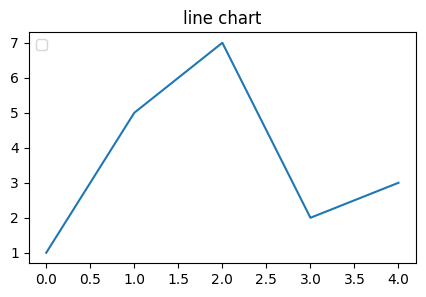

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.title("line chart")
plt.plot([1, 5, 7, 2, 3])
plt.legend(loc = "upper left")
plt.show()

In [40]:
#plt.figure(figsize=(5, 3)) #그래프 면적(x, y)
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


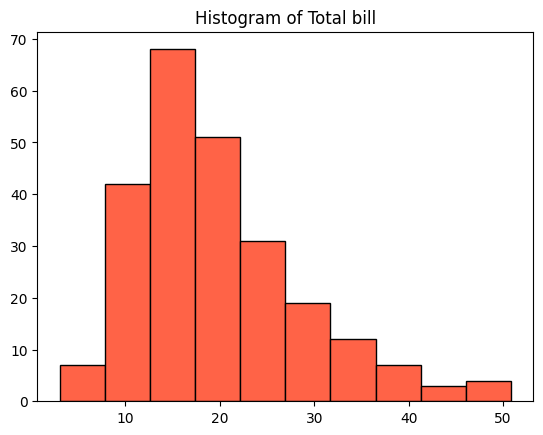

In [47]:
plt.hist(tips.total_bill, edgecolor = "k", color = "tomato")
plt.title("Histogram of Total bill")
plt.show()